# Bankruptcy Prediction

Dataset can be found at https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

It contains 5 arff files. The dataset is about bankruptcy prediction of Polish companies.The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.

Attribute Information:

- X1 net profit / total assets
- X2 total liabilities / total assets
- X3 working capital / total assets
- X4 current assets / short-term liabilities
- X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
- X6 retained earnings / total assets
- X7 EBIT / total assets
- X8 book value of equity / total liabilities
- X9 sales / total assets
- X10 equity / total assets
- X11 (gross profit + extraordinary items + financial expenses) / total assets
- X12 gross profit / short-term liabilities
- X13 (gross profit + depreciation) / sales
- X14 (gross profit + interest) / total assets
- X15 (total liabilities * 365) / (gross profit + depreciation)
- X16 (gross profit + depreciation) / total liabilities
- X17 total assets / total liabilities
- X18 gross profit / total assets
- X19 gross profit / sales
- X20 (inventory * 365) / sales
- X21 sales (n) / sales (n-1)
- X22 profit on operating activities / total assets
- X23 net profit / sales
- X24 gross profit (in 3 years) / total assets
- X25 (equity - share capital) / total assets
- X26 (net profit + depreciation) / total liabilities
- X27 profit on operating activities / financial expenses
- X28 working capital / fixed assets
- X29 logarithm of total assets
- X30 (total liabilities - cash) / sales
- X31 (gross profit + interest) / sales
- X32 (current liabilities * 365) / cost of products sold
- X33 operating expenses / short-term liabilities
- X34 operating expenses / total liabilities
- X35 profit on sales / total assets
- X36 total sales / total assets
- X37 (current assets - inventories) / long-term liabilities
- X38 constant capital / total assets
- X39 profit on sales / sales
- X40 (current assets - inventory - receivables) / short-term liabilities
- X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))
- X42 profit on operating activities / sales
- X43 rotation receivables + inventory turnover in days
- X44 (receivables * 365) / sales
- X45 net profit / inventory
- X46 (current assets - inventory) / short-term liabilities
- X47 (inventory * 365) / cost of products sold
- X48 EBITDA (profit on operating activities - depreciation) / total assets
- X49 EBITDA (profit on operating activities - depreciation) / sales
- X50 current assets / total liabilities
- X51 short-term liabilities / total assets
- X52 (short-term liabilities * 365) / cost of products sold)
- X53 equity / fixed assets
- X54 constant capital / fixed assets
- X55 working capital
- X56 (sales - cost of products sold) / sales
- X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
- X58 total costs /total sales
- X59 long-term liabilities / equity
- X60 sales / inventory
- X61 sales / receivables
- X62 (short-term liabilities *365) / sales
- X63 sales / short-term liabilities
- X64 sales / fixed assets

In [242]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from scipy.io import arff

#!pip install missingno
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [144]:
#!pip install sklearn
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [170]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

## Importing the data

The data consists of 5 arff files : 1year, 2year, 3year, 4year and 5year
We convert them into a pandas dataframe for further manipulation

In [24]:
data1 = pd.DataFrame(arff.loadarff('1year.arff')[0])
cols = ['X' + str(i+1) for i in range(len(data1.columns)-1)]
cols.append('Y')
data1.columns = cols
data1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [26]:
def load_data():
    data=[]
    for i in range (5):
        data.append(pd.DataFrame(arff.loadarff(str(i+1)+'year.arff')[0]))
    cols = ['X' + str(i+1) for i in range(len(data[0].columns)-1)]
    cols.append('Y')
    for element in data : 
        element.columns = cols
    return data

dataset = load_data()
dataset[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [28]:
for data in dataset:
    print(data.shape)

(7027, 65)
(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)


## Missing data

The source of the dataset stated that there were many missing values. Let's take a look at the missing values count for each attribute.

In [30]:
for i in range(len(dataset)):
    print(dataset[i].isnull().sum().sort_values(ascending=False).head(5))

X37    2740
X21    1622
X27     311
X60     135
X45     134
dtype: int64
X37    4518
X21    3164
X27     706
X60     543
X45     541
dtype: int64
X37    4736
X21     807
X27     715
X60     592
X45     591
dtype: int64
X37    4442
X27     641
X60     614
X45     613
X28     231
dtype: int64
X37    2548
X27     391
X60     268
X45     268
X24     135
dtype: int64


X37 is missing the most values among all the attributes in the dataset. Let's find out if the missing data has any correlation. To see the gaps in the data, we generate a sparsity matrix using the matrix function from the missingno library

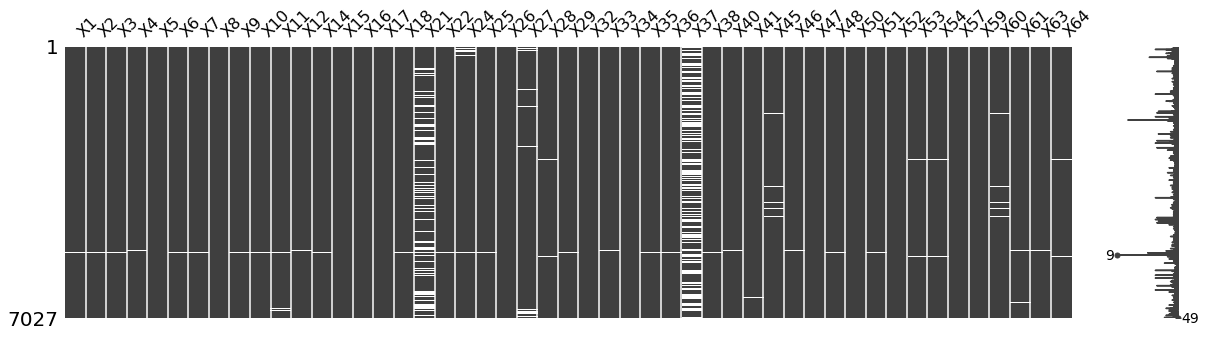

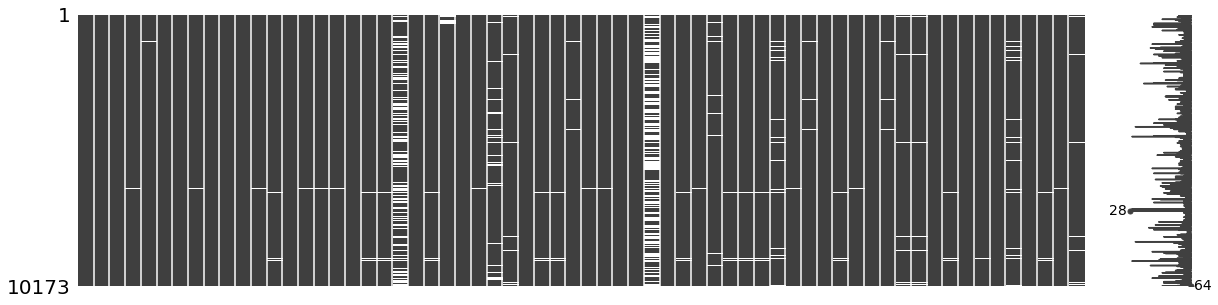

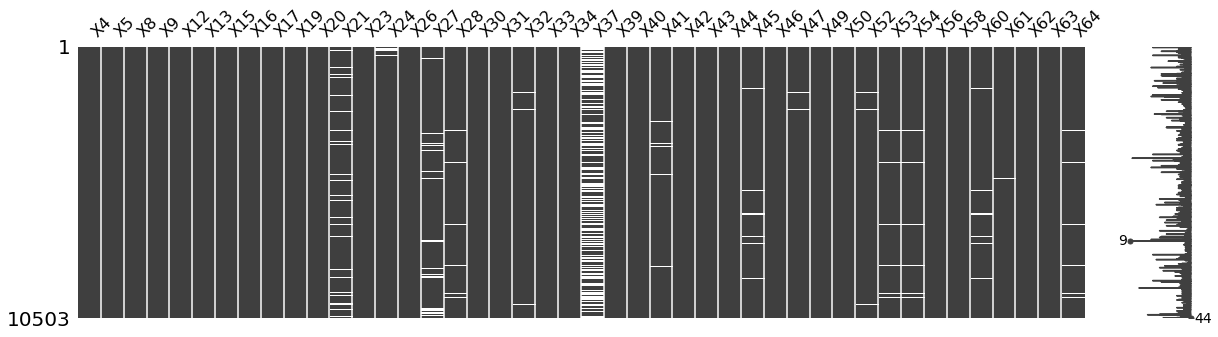

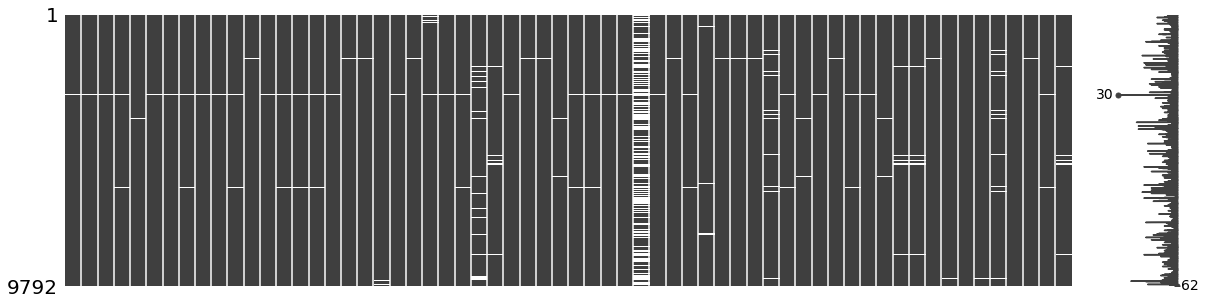

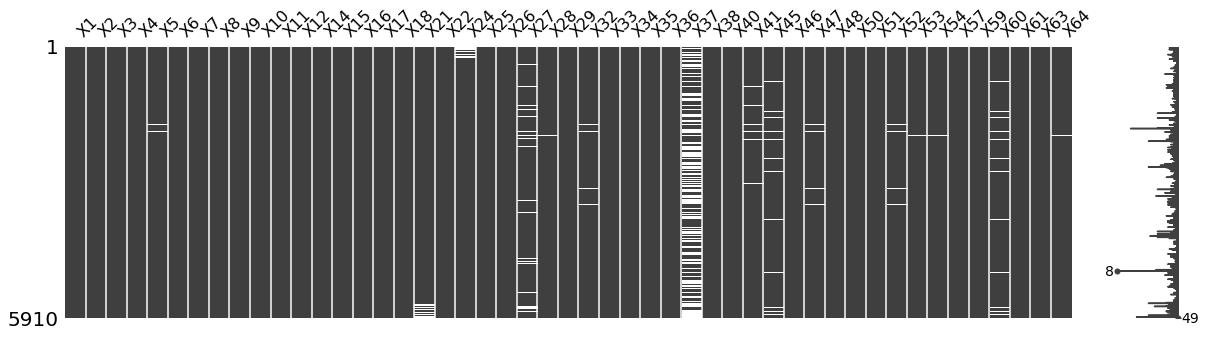

In [34]:
for i in range(5):
        missing_df_i = dataset[i].columns[dataset[i].isnull().any()].tolist()
        msno.matrix(dataset[i][missing_df_i], figsize=(20,5))

We got the confirmation that column X37 has the highest sparsity for all 5 dataframes. Attributes X21 (for 3 years) and X27 (for 2 years) is also very sparse. Since all attributes of the dataset have some missing data, we shouldn't delete all the rows with missing values, as it can cause severe data loss for our dataset. The dataset is quite imbalanced and sparse. Let's look further into this and plot the heatmaps for all dataframes to have a better look and see if any correlation exists between the missing data and the attributes.

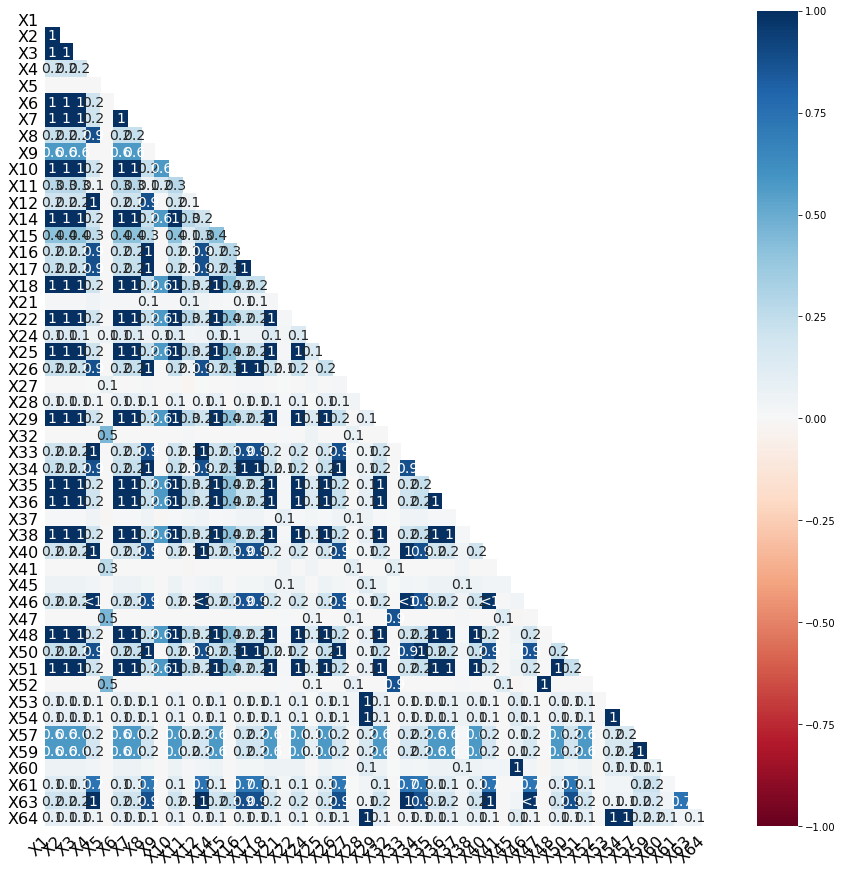

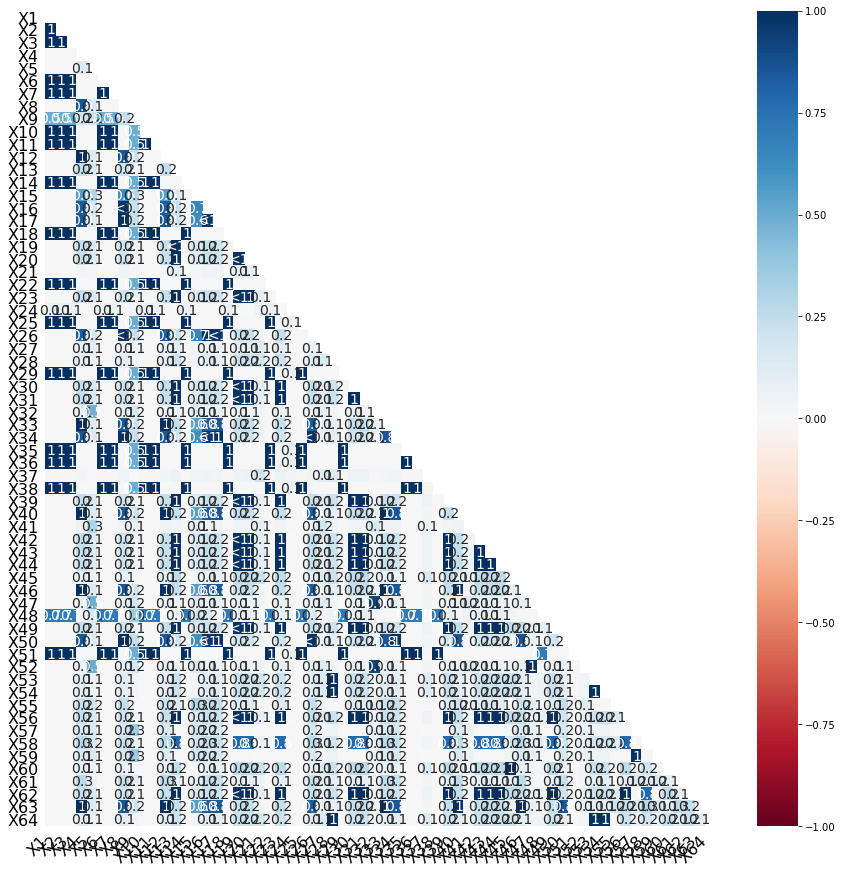

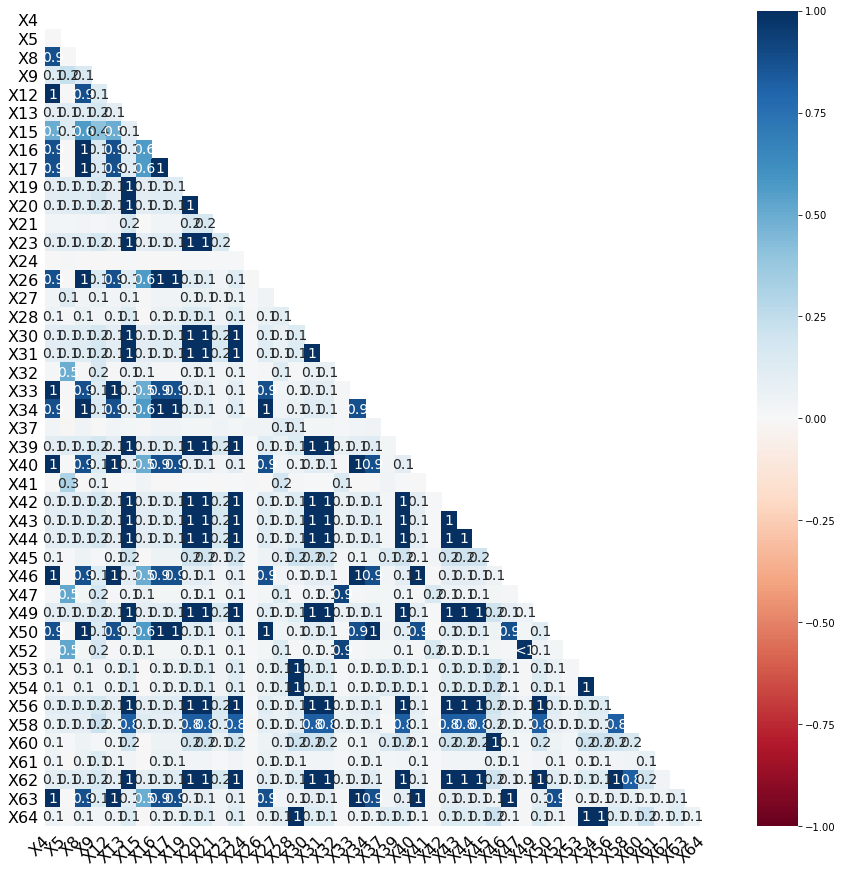

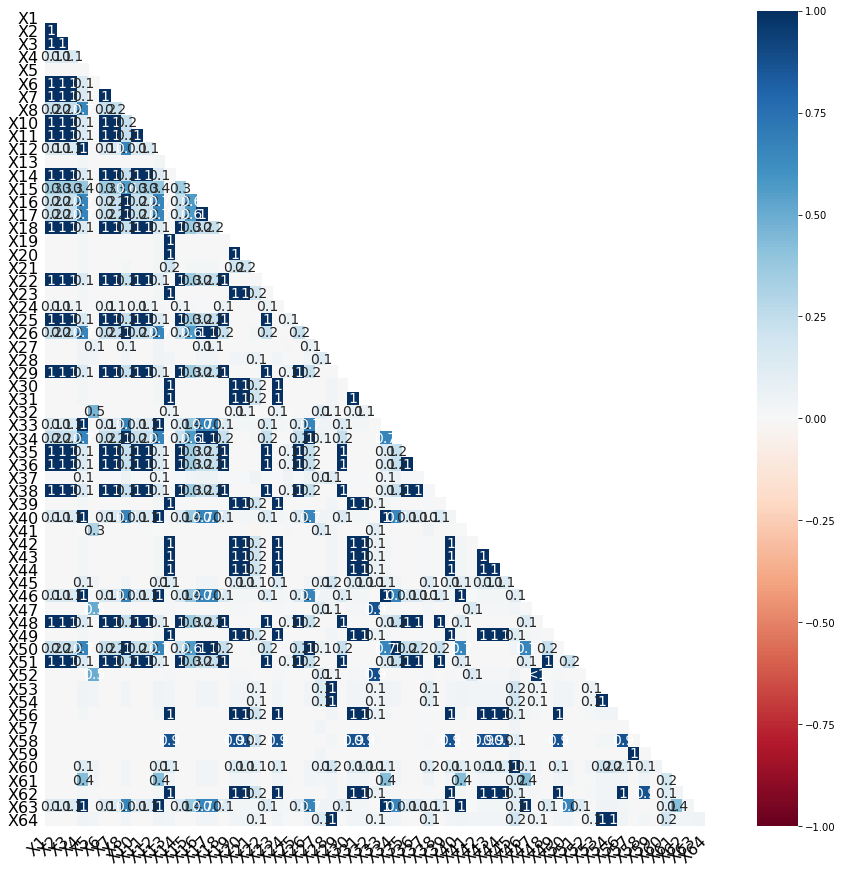

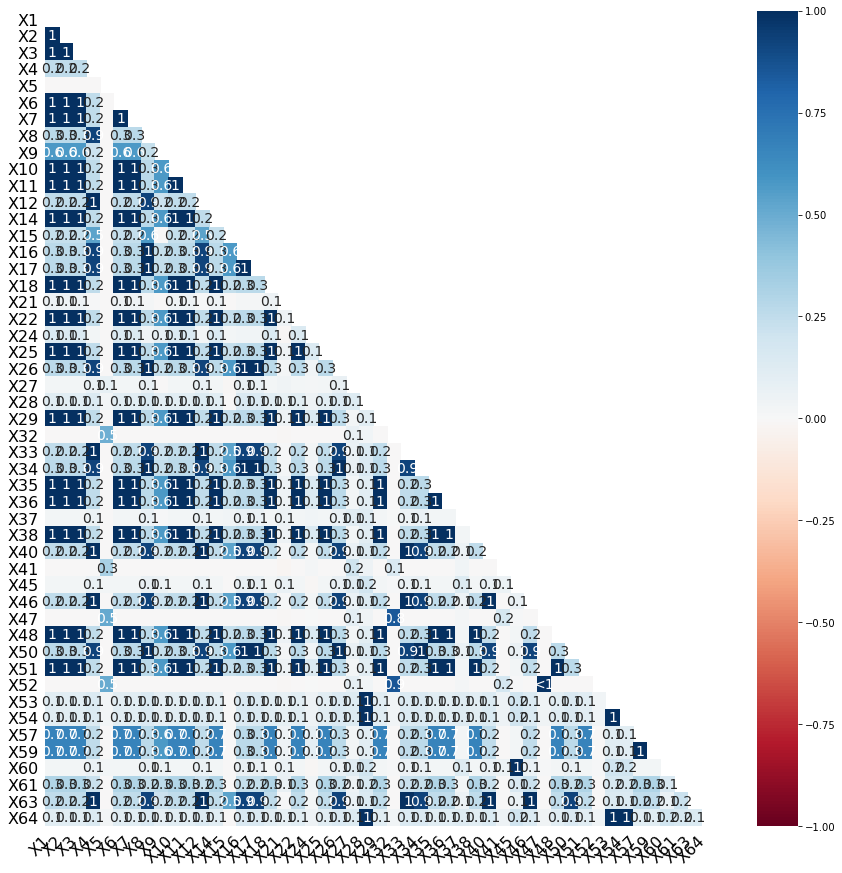

In [35]:
for i in range(5):
    missing_df_i = dataset[i].columns[dataset[i].isnull().any()].tolist()
    msno.heatmap(dataset[i][missing_df_i], figsize=(15,15))

The values displayed are the nullity correlation, ranging from -1 to 1. The more the nullity correlation value is close to 1, the more common missing values the two features have. If it's close to -1 then one feature is missing and not the other one.
We can see from this heatmap that no features are distinguishably correlated to another in all dataframes therefore we can't remove any features. We need to fill in the gaps to deal with the missing data.

## Data imputation

Let's perform mean imputation on the dataset

In [62]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_dataset = [pd.DataFrame(imputer.fit_transform(df)) for df in dataset]
for i in range(len(dataset)):
        imp_dataset[i].columns = dataset[i].columns
imp_dataset[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


Now let's take a look at the class label of our dataset, the Y column

In [73]:
for i in range(5):
    print(dataset[i]['Y'].value_counts())

b'0'    6756
b'1'     271
Name: Y, dtype: int64
b'0'    9773
b'1'     400
Name: Y, dtype: int64
b'0'    10008
b'1'      495
Name: Y, dtype: int64
b'0'    9277
b'1'     515
Name: Y, dtype: int64
b'0'    5500
b'1'     410
Name: Y, dtype: int64


(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 7027 BarContainer objects>)

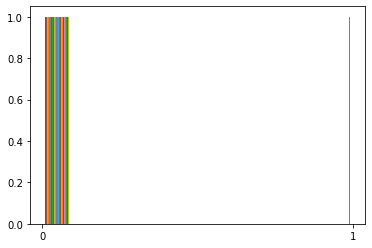

In [76]:
plt.hist(dataset[0]['Y'])

We can see that the dataset is imbalanced for 0 and 1, which means that the number of observations per class is not equally distributed; there is a large amount of data/observations for one class (referred to as the majority class), and much fewer observations for one or more other classes. If we leave the dataset as it is, we won't be able train our models well.

We want to avoid misclassifying a company that does go bankrupt so we use recall score as our scoring method : we need for the recall score to be as large as possible. We try gradient boosting model, use recall score to compare models, and oversample minority class.

We use SMOTE (Synthetic Minority Over Sampling Technique) function from the imblearn library to do so. 

In [92]:
def split_features_labels(dataset):
    all_features =[]
    all_labels =[]
    for i in range (5):
        features = [dataset[i].iloc[:,0:64]]
        all_features.append(features)
        labels = [dataset[i].iloc[:,64]]
        all_labels.append(labels)
    return all_features, all_labels

X, y = split_features_labels(imp_dataset)

In [106]:
X[1][0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,0.42695,...,242500.0,0.13184,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,0.40437,...,2179.5,0.12146,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,0.69841,...,3668.6,0.16499,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,0.32150,...,1273.8,0.29358,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,0.52167,...,18209.0,0.10124,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874


In [123]:
def oversample_minority(X, y):
    
    for i in range (5):
        # setting up testing and training sets
        X_train, X_test, y_train, y_test = train_test_split(X[i][0], y[i][0], random_state=10)
        print("Balancing year "+str(i+1)+" dataset \n")
        print('Before: \n X_train shape : ', X_train.shape, ' X_test shape : ', X_test.shape)
        print("Unbalanced X_train{}".format({n: v for n, v in zip(['Not Bankrupt', 'Bankrupt'], np.bincount(y_train))}))
        
        #performing the SMOTE function
        sm = SMOTE(random_state=10)
        X_train, y_train = sm.fit_resample(X_train, y_train)
        
        #Checking if the data is balanced or not
        print('After applying SMOTE: \n X_train shape : ', X_train.shape, ' X_test shape : ', X_test.shape)
        print("Balanced X_train {}".format({n: v for n, v in zip(['Not Bankrupt', 'Bankrupt'], np.bincount(y_train))})+"\n")


In [124]:
oversample_minority(X,y)

Balancing year 1 dataset 

Before: 
 X_train shape :  (5270, 64)  X_test shape :  (1757, 64)
Unbalanced X_train{'Not Bankrupt': 5069, 'Bankrupt': 201}
After applying SMOTE: 
 X_train shape :  (10138, 64)  X_test shape :  (1757, 64)
Balanced X_train {'Not Bankrupt': 5069, 'Bankrupt': 5069}

Balancing year 2 dataset 

Before: 
 X_train shape :  (7629, 64)  X_test shape :  (2544, 64)
Unbalanced X_train{'Not Bankrupt': 7318, 'Bankrupt': 311}
After applying SMOTE: 
 X_train shape :  (14636, 64)  X_test shape :  (2544, 64)
Balanced X_train {'Not Bankrupt': 7318, 'Bankrupt': 7318}

Balancing year 3 dataset 

Before: 
 X_train shape :  (7877, 64)  X_test shape :  (2626, 64)
Unbalanced X_train{'Not Bankrupt': 7497, 'Bankrupt': 380}
After applying SMOTE: 
 X_train shape :  (14994, 64)  X_test shape :  (2626, 64)
Balanced X_train {'Not Bankrupt': 7497, 'Bankrupt': 7497}

Balancing year 4 dataset 

Before: 
 X_train shape :  (7344, 64)  X_test shape :  (2448, 64)
Unbalanced X_train{'Not Bankrupt':

## Data modeling

Split the data

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X[1][0], y[1][0], test_size=0.2, random_state=0, shuffle=True)

In [192]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8138, 64)
(2035, 64)
(8138,)
(2035,)


In [210]:
X_train_list=[]
X_test_list=[]
y_train_list=[]
y_test_list=[]

for i in range (5):
    X_train, X_test, y_train, y_test = train_test_split(X[i][0], y[i][0], test_size=0.2, random_state=0, shuffle=True)
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

print(len(X_train_list))

(5621, 64)
(1406, 64)
(5621,)
(1406,)
(8138, 64)
(2035, 64)
(8138,)
(2035,)
(8402, 64)
(2101, 64)
(8402,)
(2101,)
(7833, 64)
(1959, 64)
(7833,)
(1959,)
(4728, 64)
(1182, 64)
(4728,)
(1182,)
5


Models : 
Naive Bayes,
Logistic Regression,
Gradient Boosting Tree,
Decision Tree Classifier,
Random Forest

In [284]:
def models(X_train, y_train, show_plots=True, score_method='recall'):
    
    clf_list = []
    lr_list = []
    gbm_list =[]
    
    for i in range(5):
        
        #Naive Bayes
        clf = GaussianNB()
        clf.fit(X_train[i], y_train[i])
        clf_list.append(clf)
        
        #Logistic Regression
        listC = 10.0**np.arange(-4,4)
        parameter = {'C':listC}
        
        lr = LogisticRegression(penalty = 'l2')
        lbest = GridSearchCV(lr, parameter,  scoring='recall', cv=5)
        lbest.fit(X_train[i], y_train[i])
        lr = LogisticRegression(penalty = 'l2', C = 0.0001)
        lr = lbest.best_estimator_
        lr.fit(X_train[i], y_train[i])
        lr_list.append(lr)
        
        #Gradient Boosting
        gbm = GradientBoostingClassifier(random_state=10)
        gbm.fit(X_train[i], y_train[i])
        gbm_list.append(gbm)
    
    models = [clf_list, lr_list, gbm_list]
    return models

In [285]:
firstmodels = models(X_train_list, y_train_list)
print(len(firstmodels[0]))

5


### Decision Tree Classifier

In [288]:
dt_list = []

In [289]:
maxDepth = 20
kFold = 5
scores = np.zeros((maxDepth, kFold))

for depth in np.arange(1, maxDepth + 1):
    model_Dtree = DecisionTreeClassifier(max_depth=depth)
    scores[depth - 1] = cross_val_score(model_Dtree, X_train, 
                                        y_train, cv=kFold)

In [290]:
training_scores_list =[]
testing_scores_list =[]

for i in range(5):
    training_scores = np.zeros((maxDepth, 1))
    testing_scores = np.zeros((maxDepth, 1))
    training_scores_list.append(training_scores)
    testing_scores_list.append(testing_scores)

for i in range(5):
    for depth in np.arange(1, maxDepth + 1):
        clf = DecisionTreeClassifier(max_depth=depth)
        clf.fit(X_train_list[i], y_train_list[i])
        training_scores_list[i][depth - 1] = clf.score(X_train_list[i], y_train_list[i])
        testing_scores_list[i][depth - 1] = clf.score(X_test_list[i], y_test_list[i])

In [291]:
print(len(training_scores_list))
training_scores_list[0]

5


array([[0.96157267],
       [0.97438178],
       [0.97882939],
       [0.98043053],
       [0.98363281],
       [0.98505604],
       [0.98594556],
       [0.98808041],
       [0.99057107],
       [0.99288383],
       [0.99377335],
       [0.99466287],
       [0.9957303 ],
       [0.99661982],
       [0.99679772],
       [0.99715353],
       [0.99786515],
       [0.99857677],
       [0.99911048],
       [0.9998221 ]])

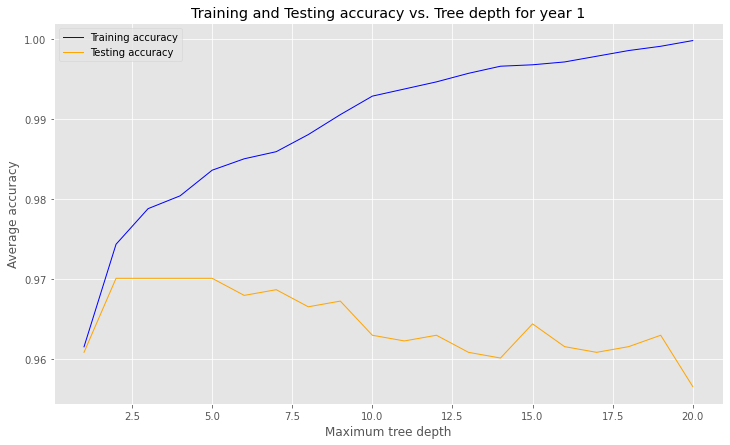

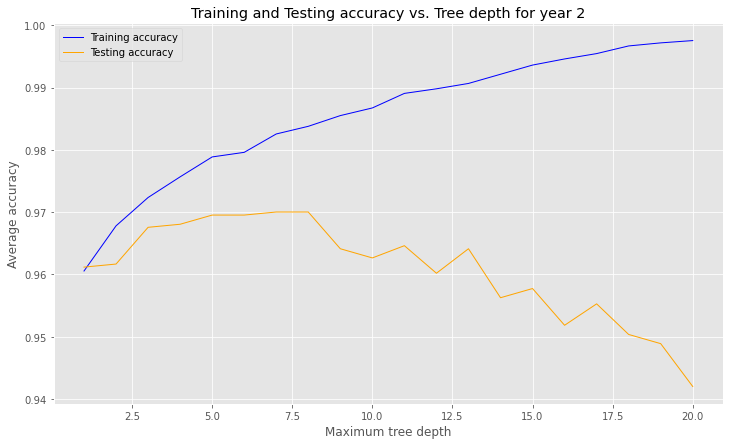

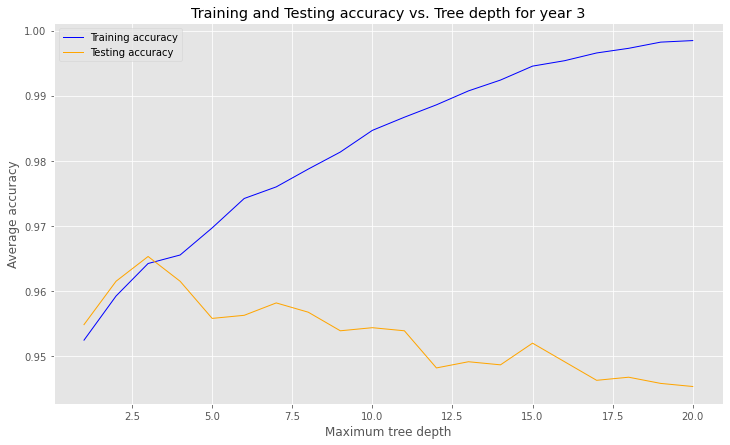

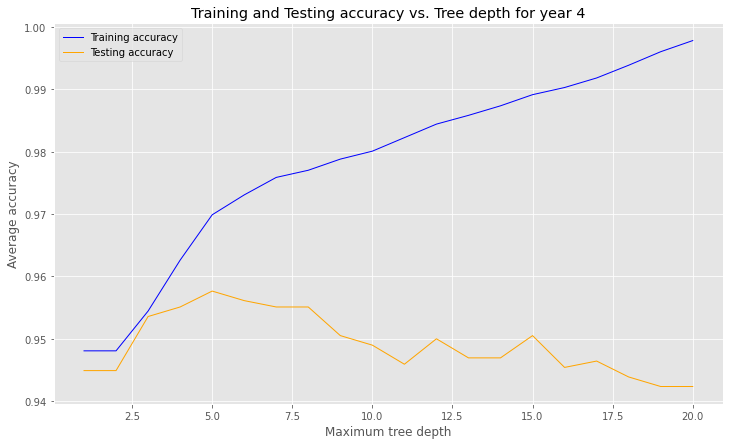

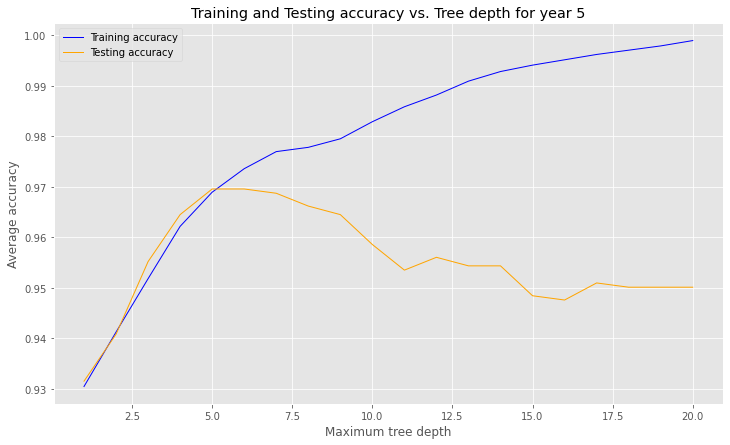

In [292]:
for i in range(5):
    plt.style.use('ggplot')
    plt.gcf().set_size_inches(12, 7)
    plt.plot(range(1, maxDepth + 1), training_scores_list[i], color='blue', lw=1, label='Training accuracy')
    plt.plot(range(1, maxDepth + 1), testing_scores_list[i], color='orange', lw=1, label='Testing accuracy')
    plt.xlabel("Maximum tree depth")
    plt.ylabel("Average accuracy")
    plt.title("Training and Testing accuracy vs. Tree depth for year "+str(i+1))
    plt.legend(loc="best")
    plt.show()

The best max tree depth seems to be 5 overall for all five years.

In [293]:
train_scores = []
test_scores =[]

for i in range(5):
    tree = DecisionTreeClassifier(max_depth=5)
    tree.fit(X_train_list[i], y_train_list[i])
    print("Scores for year "+str(i+1))
    print("Training score :",clf.score(X_train_list[i], y_train_list[i]))
    print("Testing score :",clf.score(X_test_list[i], y_test_list[i]),"\n")
    train_scores.append(clf.score(X_train_list[i], y_train_list[i]))
    test_scores.append(clf.score(X_test_list[i], y_test_list[i]))
    dt_list.append(tree)

Scores for year 1
Training score : 0.9594378224515211
Testing score : 0.9566145092460882 

Scores for year 2
Training score : 0.9497419513393954
Testing score : 0.9508599508599509 

Scores for year 3
Training score : 0.9133539633420614
Testing score : 0.9124226558781533 

Scores for year 4
Training score : 0.9226350057449253
Testing score : 0.9213884635017866 

Scores for year 5
Training score : 0.998942470389171
Testing score : 0.9500846023688664 



Text(0.5, 0, 'Year')

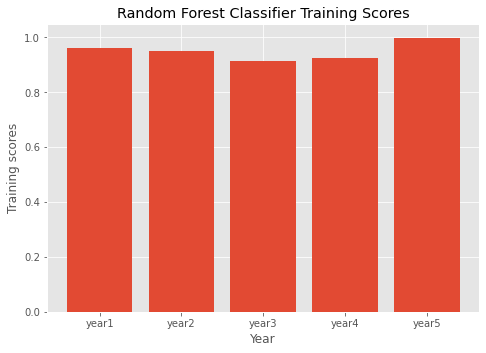

In [294]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['year1', 'year2', 'year3', 'year4', 'year5']
y = train_scores
ax.bar(x,y)
plt.title('Random Forest Classifier Training Scores')
plt.ylabel('Training scores')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

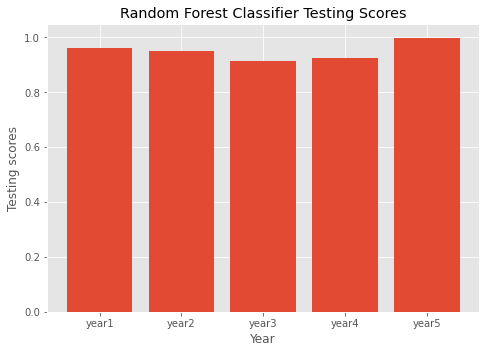

In [295]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['year1', 'year2', 'year3', 'year4', 'year5']
y = train_scores
ax.bar(x,y)
plt.title('Random Forest Classifier Testing Scores')
plt.ylabel('Testing scores')
plt.xlabel('Year')

In [296]:
firstmodels.append(dt_list)
print(len(firstmodels))

4


### Random Forest

In [297]:
rf_list=[]

Accuracy 0.9637268847795164 
 Precision [0.96829971 0.61111111] 
 Recall [0.99481865 0.2       ]
[[1344    7]
 [  44   11]]


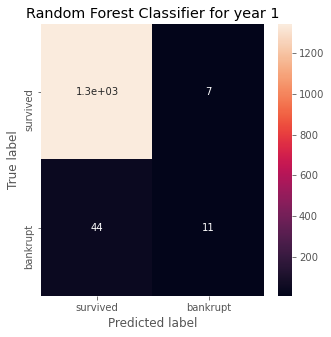

Accuracy 0.9641277641277641 
 Precision [0.96817504 0.625     ] 
 Recall [0.99539877 0.18987342]
[[1947    9]
 [  64   15]]


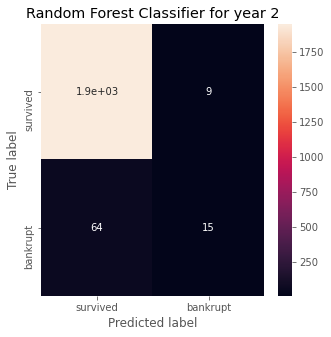

Accuracy 0.9614469300333175 
 Precision [0.96430294 0.75      ] 
 Recall [0.99651047 0.22105263]
[[1999    7]
 [  74   21]]


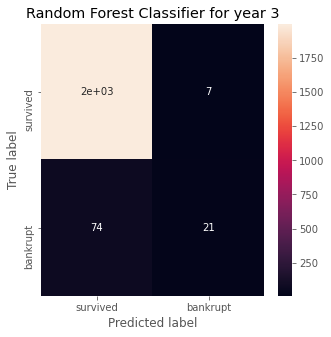

Accuracy 0.9448698315467075 
 Precision [0.95225739 0.5       ] 
 Recall [0.99135602 0.14814815]
[[1835   16]
 [  92   16]]


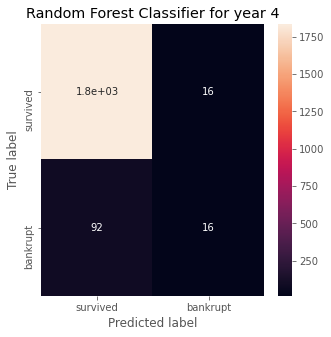

Accuracy 0.949238578680203 
 Precision [0.9602122  0.70588235] 
 Recall [0.98637602 0.44444444]
[[1086   15]
 [  45   36]]


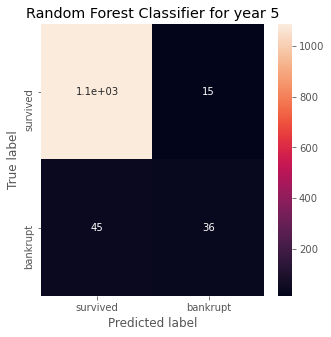

In [328]:
for i in range(5):
                    rf = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')
                    rf_list.append(rf)
                    clf=rf.fit(X_train_list[i], y_train_list[i])
                    y_pred = clf.predict(X_test_list[i])
                
                    accuracy_rf = accuracy_score(y_test_list[i], y_pred, normalize=True)
                    recall_rf = recall_score(y_test_list[i], y_pred, average=None)
                    precision_rf = precision_score(y_test_list[i], y_pred, average=None)
                    confusion_matrix_rf = confusion_matrix(y_test_list[i], y_pred)
                    print("Accuracy",accuracy_rf ,"\n","Precision",precision_rf,"\n","Recall",recall_rf)
                    
                    print(confusion_matrix_rf)
                    confusion_matrix_rf_df = pd.DataFrame(confusion_matrix_rf,
                                         index = ['survived','bankrupt'], 
                                         columns = ['survived','bankrupt'])
                    

                    plt.figure(figsize=(5,5))
                    sns.heatmap(confusion_matrix_rf_df, annot=True)
                    plt.title('Random Forest Classifier for year '+str(i+1))
                    plt.ylabel('True label')
                    plt.xlabel('Predicted label')
                    plt.show()

In [299]:
firstmodels.append(rf_list)
len(firstmodels)

5

In [315]:
def accuracy_ranking(list_models):
    column_headers = ['year1','year2','year3','year4','year5','Average accuracy score']
    rows = []
    for i in range (len(list_models)):
        xrow =[]
        for j in range (5):
            clf = list_models[i][j]
            y_pred = clf.predict(X_test_list[j])
            acs = accuracy_score(y_test_list[j], y_pred, normalize=True)
            xrow.append(acs)
        avg = np.mean(xrow)
        xrow.append(avg)
        rows.append(xrow)
        
    results_df = pd.DataFrame(data=rows, columns = column_headers)
    return results_df

In [337]:
AR = accuracy_ranking(firstmodels)
AR

,year1,year2,year3,year4,year5,Average accuracy score
0,0.076814,0.082555,0.099476,0.117917,0.153130,0.105979
1,0.960171,0.961179,0.953356,0.942828,0.930626,0.949632
2,0.972973,0.972973,0.968110,0.960184,0.971235,0.969095
3,0.970128,0.968550,0.955735,0.957121,0.968697,0.964046
4,0.969417,0.964619,0.953832,0.946912,0.938240,0.954604


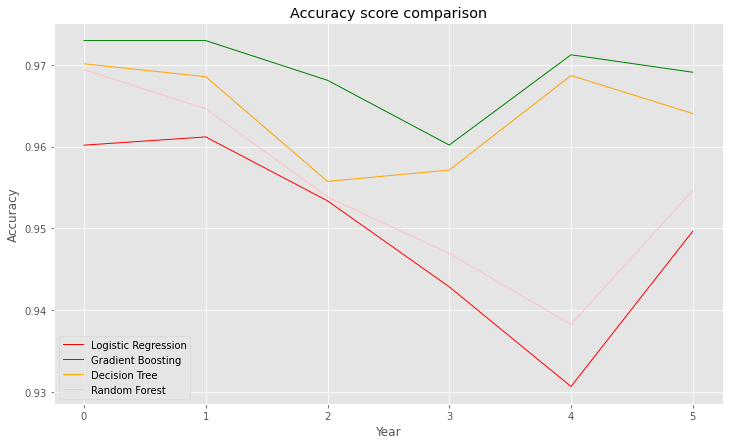

In [349]:
plt.style.use('ggplot')
plt.gcf().set_size_inches(12, 7)
#plt.plot(range(6), AR.iloc[0,:], color='blue', lw=1, label='Naive Bayes') #too small so we remove it
plt.plot(range(6),AR.iloc[1,:], color='red', lw=1, label='Logistic Regression')
plt.plot(range(6), AR.iloc[2,:], color='green', lw=1, label='Gradient Boosting')
plt.plot(range(6),AR.iloc[3,:], color='orange', lw=1, label='Decision Tree')
plt.plot(range(6), AR.iloc[4,:], color='pink', lw=1, label='Random Forest')
plt.xlabel("Year")
plt.ylabel("Accuracy")
plt.title("Accuracy score comparison")
plt.legend(loc="best")
plt.show()

In [319]:
def precision_ranking(list_models):
    column_headers = ['year1','year2','year3','year4','year5','Average precision score']
    rows = []
    for i in range (len(list_models)):
        xrow =[]
        for j in range (5):
            clf = list_models[i][j]
            y_pred = clf.predict(X_test_list[j])
            ps = precision_score(y_test_list[j], y_pred, average=None)
            xrow.append(ps[0])
        avg = np.mean(xrow)
        xrow.append(avg)
        rows.append(xrow)
        
    results_df = pd.DataFrame(data=rows, columns = column_headers)
    return results_df

In [350]:
PR = precision_ranking(firstmodels)
PR

,year1,year2,year3,year4,year5,Average precision score
0,0.964912,0.978495,0.975000,0.936170,0.980769,0.967069
1,0.960854,0.961179,0.954719,0.944757,0.931414,0.950585
2,0.977455,0.974065,0.971317,0.964866,0.973381,0.972217
3,0.974619,0.974423,0.970025,0.962808,0.969965,0.970368
4,0.973227,0.968191,0.961780,0.951888,0.947735,0.960564


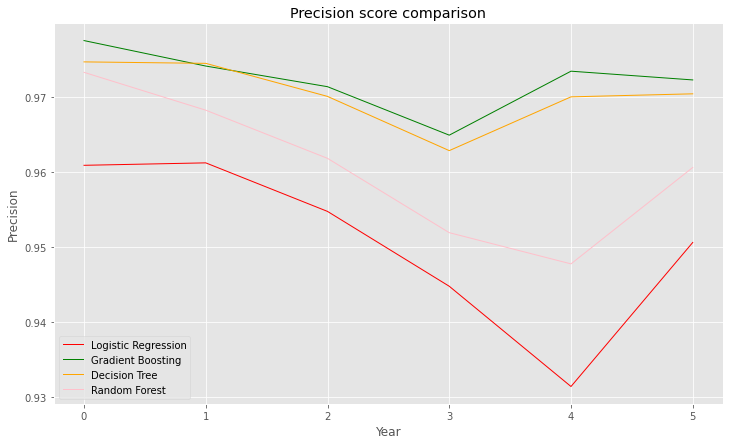

In [351]:
plt.style.use('ggplot')
plt.gcf().set_size_inches(12, 7)
#plt.plot(range(6), AR.iloc[0,:], color='blue', lw=1, label='Naive Bayes') #too small so we remove it
plt.plot(range(6),PR.iloc[1,:], color='red', lw=1, label='Logistic Regression')
plt.plot(range(6),PR.iloc[2,:], color='green', lw=1, label='Gradient Boosting')
plt.plot(range(6),PR.iloc[3,:], color='orange', lw=1, label='Decision Tree')
plt.plot(range(6),PR.iloc[4,:], color='pink', lw=1, label='Random Forest')
plt.xlabel("Year")
plt.ylabel("Precision")
plt.title("Precision score comparison")
plt.legend(loc="best")
plt.show()

In [321]:
def recall_score_ranking(list_models):
    column_headers = ['year1','year2','year3','year4','year5','Average recall score']
    rows = []
    for i in range (len(list_models)):
        xrow =[]
        for j in range (5):
            clf = list_models[i][j]
            y_pred = clf.predict(X_test_list[j])
            rs = recall_score(y_test_list[j], y_pred, average=None)
            xrow.append(rs[0])
        avg = np.mean(xrow)
        xrow.append(avg)
        rows.append(xrow)
        
    results_df = pd.DataFrame(data=rows, columns = column_headers)
    return results_df

In [352]:
RS = recall_score_ranking(firstmodels)
RS

,year1,year2,year3,year4,year5,Average recall score
0,0.040711,0.046524,0.058325,0.071313,0.092643,0.061903
1,0.999260,1.000000,0.998504,0.997839,0.999092,0.998939
2,0.994819,0.998466,0.996012,0.994057,0.996367,0.995944
3,0.994819,0.993354,0.984048,0.992977,0.997275,0.992494
4,0.995559,0.995910,0.991027,0.994057,0.988193,0.992949


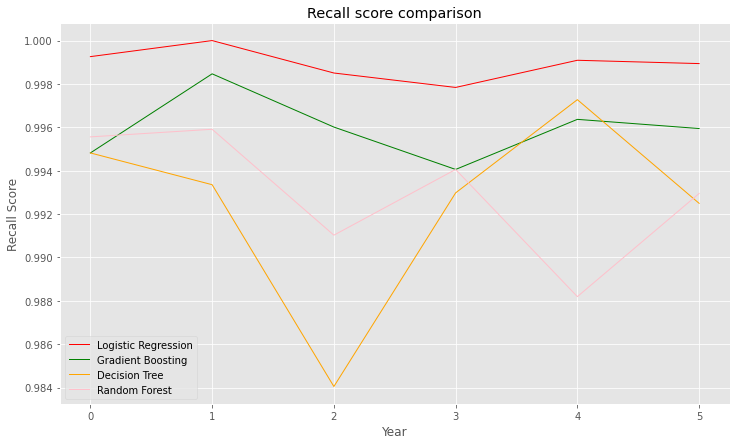

In [353]:
plt.style.use('ggplot')
plt.gcf().set_size_inches(12, 7)
#plt.plot(range(6), AR.iloc[0,:], color='blue', lw=1, label='Naive Bayes') #too small so we remove it
plt.plot(range(6),RS.iloc[1,:], color='red', lw=1, label='Logistic Regression')
plt.plot(range(6),RS.iloc[2,:], color='green', lw=1, label='Gradient Boosting')
plt.plot(range(6),RS.iloc[3,:], color='orange', lw=1, label='Decision Tree')
plt.plot(range(6),RS.iloc[4,:], color='pink', lw=1, label='Random Forest')
plt.xlabel("Year")
plt.ylabel("Recall Score")
plt.title("Recall score comparison")
plt.legend(loc="best")
plt.show()

Gradient Boosting model (3rd position in our list firstmodel) has the highest accuracy and precision scores and the 2nd best recall rate behind the Logistic Regression model. Gradient Boosting model is therefore the best model for predicting bankruptcy among those we have tested. Logistic Regression and Decision Tree come as close second.